Plot the power for each brain region

In [1]:
import os
import glob

import numpy as np
import xarray as xr

from brainets.plot import plot_marsatlas

import matplotlib.pyplot as plt
import plotly.express as px

# %matplotlib notebook

---

# **Load the epochs**

In [4]:
################################################################################
# file settings
reference = 'sample_resp'  # {'sample_stim', 'sample_resp'}
freq = "f50f150"  # {"f50f150", "f8f24"}
smoothing = "sm0"

# folders location
analysis = '/hpc/brainets/data/db_ebrains/analysis'
################################################################################

# build the path where the epochs are saved
path_epochs = os.path.join(analysis, 'epochs', reference, f"{freq}-{smoothing}", 'data')
assert os.path.isdir(path_epochs)
files = glob.glob(os.path.join(path_epochs, "*.nc"))

# loop over the files
data = []
for n_f, f in enumerate(files):
    print(f"Loading subject #{n_f}", end="\r")
    _data = xr.load_dataarray(f).mean('trials').groupby('roi').mean('roi')
    data += [_data.sel(times=slice(-2., 3.))]
data = xr.concat(data, 'roi').groupby('roi').mean('roi')

---

# **Plot the power** 

    Load MarsAtlas labels
/home/combrisson.e/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: PerformanceWarning: indexing past lexsort depth may impact performance.
  interactivity=interactivity, compiler=compiler, result=result)
/home/combrisson.e/toolbox/brainets_code/brainets/plot/plot_marsatlas.py:237: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(color='white')
/home/combrisson.e/toolbox/brainets_code/brainets/plot/plot_marsatlas.py:242: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This 

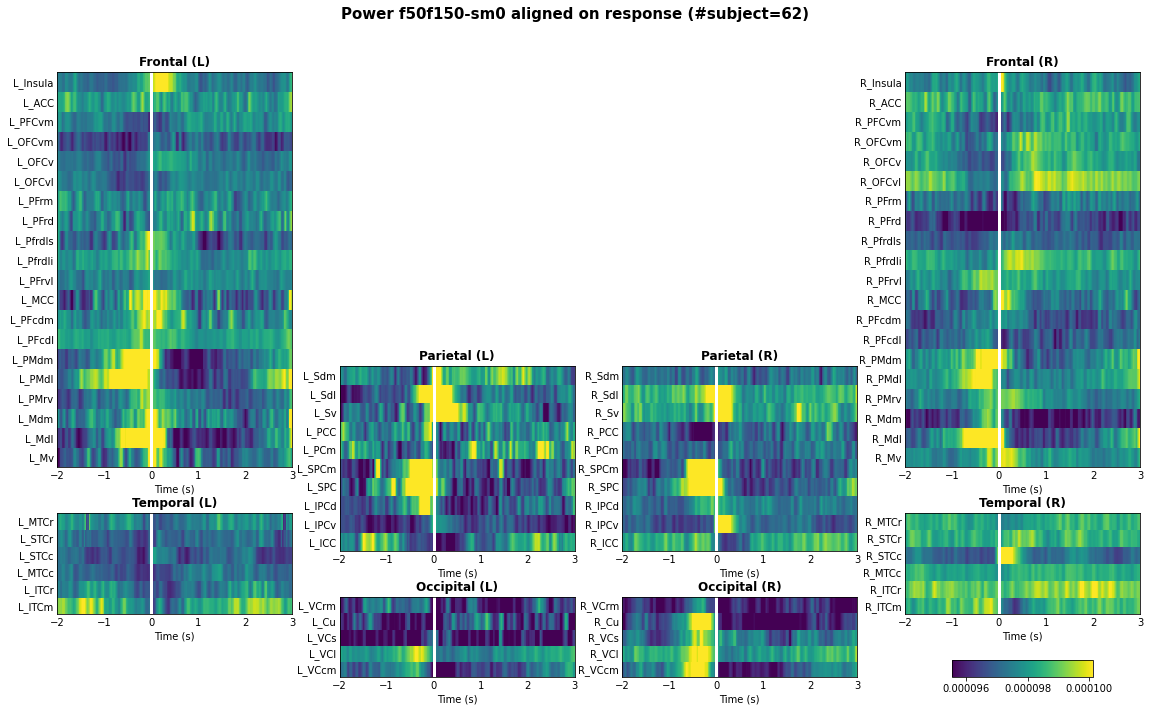

In [5]:
sub = {
    'sample_stim': 'stimulus presentation',
    'sample_resp': 'response'
}[reference]

title = f"Power {freq}-{smoothing} aligned on {sub} (#subject={len(files)})"
vlines = {0.: dict(color='white', lw=3)}

fig = plot_marsatlas(
    data, subcortical=False, contrast=3, cmap='viridis', title=title,
    vlines=vlines
)
# fig

In [ ]:
data.sel(roi='R_Mdm').plot.line()

In [ ]:
import copy
cmap = copy.copy(mpl.cm.get_cmap("viridis"))

In [ ]:
roi_s = 'L_Mv'

# loop over the files
data_s = {}
for n_f, f in enumerate(files):
    if n_f == 32: continue
    print(f"Loading subject #{n_f}", end="\r")
    _data = xr.open_dataarray(f)
    if roi_s in _data['roi'].data:
        _data = _data.sel(roi=roi_s).load().mean('trials')
        if _data.ndim == 2: _data = _data.mean('roi')
        try:
            _data = _data.squeeze().drop(('roi', 'contacts'))
        except:
            _data = _data.squeeze()
        data_s[f's{n_f}'] = _data.sel(times=slice(-2., 3.))
    else:
        continue
data_s = xr.Dataset(data_s).to_array('subjects')

In [ ]:
data_s.plot.line(x='times', col='subjects', col_wrap=5)

In [ ]:
# loop over the files
d10 = xr.open_dataarray(files[42])
d10 = d10.sel(roi='L_Mv').load().mean('trials').sel(times=slice(-2., 3.))

In [ ]:
# d10.plot.line(x='times', col='contacts')
px.line(
    d10.to_dataframe('hga').reset_index(), x='times', y='hga', facet_col='contacts'
)

In [ ]:
files[42]